# This Notebook contains all solutions from the Exercise 2

## Task 1

### Nr. 1.1

- Write a Python program `csv2json` to convert a given CSV file into a JSON file. This conversion should be generic as possible and able to convert different types of CSV files. For the beginning try to make it work with the [`lotr_clean.csv`](lotr_clean.csv) file I uploaded to GitHub.  

For the first part of this task we only concentrated on making our program work with the [`lotr_clean.csv`](lotr_clean.csv). For this we first read the file as usual.  
To make the writing process easier later on we define our "base" already in the first part. This base contains (entered by hand) all column names and their corresponding fields.  
This is repeated for all lines

In [ ]:
# Importing modules
import csv
import json
# Opening the csv File
with open("./lotr_clean.csv", "r") as csvFile:
    reader = csv.reader(csvFile, delimiter=";")
    # Ignoring first line containing column names
    next(reader)
    # Creating base
    data = {"LOTR": []}
    # Iterating over all rows
    for row in reader:
        # Appending every data in all rows
        data["LOTR"].append({"row": row[0], "characters": row[1], "dialogue": row[2], "movie": row[3]})
# Writing data to the json file
with open("lotr_converted.json", "w") as jsonFile:
    json.dump(data, jsonFile, indent=4)

### Nr. 1.2

- Write a Python program `csv2json` to convert a given CSV file into a JSON file. This conversion should be generic as possible and able to convert different types of CSV files. For the beginning try to make it work with the [`lotr_clean.csv`](lotr_clean.csv) file I uploaded to GitHub. Think about the generic parts. Where do the JSON key names come from? What about different types of separators? Try to build your program from "simple" to "a bit more complex" and think about how to split the development within your group. Document your program and remember to commit early and commit often.

Now comes the more difficult part. We try to rewrite our program in a way that in the best case every .csv file can be read and output as .json format. There are always exceptions but this should work for most cases. To format several files at once, we iterate through the entire working directory and search for the .csv files that we will use step by step. Of course we have to read in our file first. Here we come across our first bigger problem. In the first part of the task it was still clear which delimiter the .csv file uses, but to be able to accept different delimiters we use the `sniffer()` function. With this we can find out which delimiter the file uses by testing a sample. Our next problem are the column names. We cannot type them by hand like in the first part but have to search for them. Here the function `fieldnames` does the work for us. At this point we can simply use all the data we have collected as in the first part of the task.  
So that the task is fulfilled the final program is also executable with the file [`csv2json.py`](./csv2json.py)

In [ ]:
# Importing modules
import json
import os
import csv
print("Importing files...")
# Iterating over all files that end with ".csv" in the current working directory
for csvFilename in os.listdir("."):
    if not csvFilename.endswith(".csv"):
        continue
    print("Working...")
    # Opening the CSV file
    with open(csvFilename, "r") as csvFile:
        # Reading in a sample and testing which delimiter is used
        dialect = csv.Sniffer().sniff(csvFile.read(1000), delimiters=";,")
        csvFile.seek(0)
        # Reading in the CSV file
        reader = csv.DictReader(csvFile, delimiter = dialect.delimiter)
        # Searching for column headings
        column_names = reader.fieldnames
        # Creating base for later writing
        base = []
        for row in reader:
            base.extend([{column_names[i]:row[column_names[i]] for i in range(len(column_names))}])
        # Creating a new file
        with open(csvFilename + "_converted_to.json", "w") as jsonFile:
            # Writing data to the JSON file
            json.dump(base, jsonFile, indent=4)
print("Done!")
input("Press any key to continue.")

## Task 2

### Nr. 2.1

- Your task is to transform a dataset on movies since 1950. Download the dataset [`movies.json`](movies.json) from our Github repository. Write a Python program to:

  1. read in the data from the JSON file,
  2. count for each year, how many movies per genre have appeared,
  3. create a CSV file where for each year, the counts for each genre are listed.

  Your final CSV should look something like this:

year|Action|Adventure|Animation|...
-----|------|----------|--------|---
1950|39|42|65|...
1951|...|...|...|...

In this task we are dealing with a somewhat more difficult `.json` file. It is nested and therefore requires some more loops than in the other tasks. Opening and reading the file does not need to be explained again at this point. Similar to the first task, we made a list of all genres per year and put it in a dictionary.  
To find out how often a genre appears in the movies per year, we counted this list of genres per year with the `Counter()` function. This function did a lot of the work for us.  
We also created a list which contains all "possible" genres. We have sorted them to make it similar to the task example. Because some movies had no genres, we had to delete the first column of each entry.  
The last step before writing the file is to prepare our "base" again. In this task this is called `dictio`. But so far it only contains the columns names and no dates or numbers. These are assigned to the respective columns only at the very end.  
Finally we had to find a solution for the years in which a genre from another year does not occur. Therefore we set the value 0 for each genre not found.

In [ ]:
# Importing modules
import json
import csv
from collections import Counter
# Opening the CSV file
with open("./movies.json", "r") as jsonfile:
    # Reading in the CSV file
    dataset = json.load(jsonfile)
    # Creating function for better readability
    def count_genre(year):
        # Searching for all genres in all years and all films
        genres = []
        for films in dataset[year].keys():
            genres.append(list(dataset[year][films]["genre"]))
        genres = dict(Counter([y for x in genres for y in x]))
        return(genres)
    # Creating a list with all available genres
    unique_genres = []
    for x in dataset.keys():
        for y in dataset[x].keys():
            unique_genres.append(list(dataset[x][y]["genre"]))
    sum_genres = [y for x in unique_genres for y in x]
    # Sorting the list alphabetically and removing duples
    sum_genres = sorted(list(dict.fromkeys(sum_genres)))
    # Deleting the first row as there is no content (no genre)
    del sum_genres[0]
    # Creating a list with all years
    years = []
    years.append(list(dataset.keys()))
    # Removing list in list
    years = [y for x in years for y in x]
    # Creating base for later writing
    dictio = {}
    for x in years:
        dictio[x] = count_genre(x)
    fieldnames = ["year"]
    fieldnames.extend(sum_genres)
# Creating a new file
with open("./movies.csv", "w", newline="") as csvfile:
    # Writing data to the CSV file
    writer = csv.writer(csvfile, delimiter=",")
    writer.writerow(fieldnames)
    for x in years:
        numbers = [int(x)]
        for y in sum_genres:
            try:
                numbers.append(dictio[x][y])
            except KeyError:
                numbers.append(0)
        writer.writerow(numbers)

___

## Bonus

- Create some interesting figures (in spreadsheet software, with R or any other visualitation software you know) on the development of genres over time.

Since python and some of its modules are great for data analysis, we decided not to bother using another program or language to solve this task.  
The following [page](https://python-graph-gallery.com/) gives us an overview of the available diagrams, which we can use for visualization.    
In order to get an overview of the data, we display the complete table. You can see at a glance if there is a big change between the first year and the last year.

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
# Reading in the CSV file
dataset = pd.read_csv("./movies.csv")
# Defining the standart figure size
figuresize = (15, 7)
# Printing the CSV file
dataset

,year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1950,39,42,65,8,187,92,48,239,85,...,3,0,55,8,150,11,6,15,20,70
1,1951,42,51,59,9,154,74,61,262,77,...,4,0,65,17,129,13,11,22,23,54
2,1952,40,65,55,16,174,57,67,264,72,...,7,0,63,10,128,9,8,19,20,60
3,1953,49,74,50,16,170,87,78,273,67,...,6,1,76,25,153,9,7,18,34,67
4,1954,36,81,63,14,166,72,74,266,85,...,6,1,62,24,150,11,4,19,15,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2013,437,245,191,114,863,275,258,1282,163,...,21,84,352,155,261,44,13,440,20,11
64,2014,429,241,160,120,907,295,259,1352,182,...,20,83,368,167,260,52,19,448,48,21
65,2015,460,259,175,133,953,293,277,1450,181,...,10,71,344,192,267,52,15,486,33,10
66,2016,445,241,156,100,913,284,260,1383,160,...,7,60,314,155,199,45,16,483,32,18


As you can see, there is a strong change over the years in the fields:  
- `Thriller`
- `Drama`
- `Sci-Fi`
- `Comedy`
- `Action`  

We would now like to present these graphically

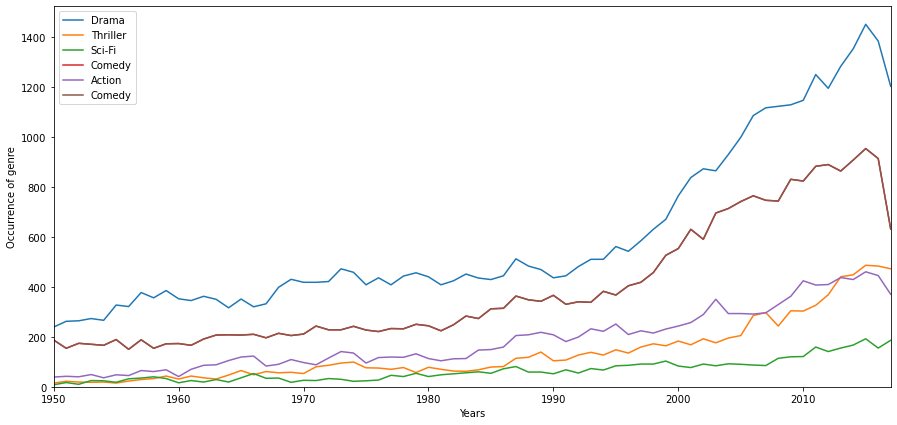

In [2]:
# Defining x axis
x = dataset["year"]
# Defining all y axis
yThriller = dataset["Thriller"]
yDrama = dataset["Drama"]
ySci_Fi = dataset["Sci-Fi"]
yComedy = dataset["Comedy"]
yAction = dataset["Action"]
# Aplying the figursize
plt.figure(figsize = figuresize)
# Drawing all the plots
plt.plot(x, yDrama, label = "Drama")
plt.plot(x, yThriller, label = "Thriller")
plt.plot(x, ySci_Fi, label = "Sci-Fi")
plt.plot(x, yComedy, label = "Comedy")
plt.plot(x, yAction, label = "Action")
plt.plot(x, yComedy, label = "Comedy")
# Setting the y axis limit to 0 as there are no negative counts
plt.ylim(0)
# Setting the x axis limits to the range of years in our csv table
plt.xlim(1950,2017)
# Defining the x and y axis labels
plt.ylabel("Occurrence of genre")
plt.xlabel("Years")
# Aplying the labels to the plot
plt.legend()

On the basis of this graphic you can see that the above mentioned genres have become more and more attractive over the years. This could be due to the fact that people's interests are adapting to the research and development of the world. So you could say that people are looking into the future or present rather than into the time of black and white films.  
To prove this thesis we now look at the course of black and white films.

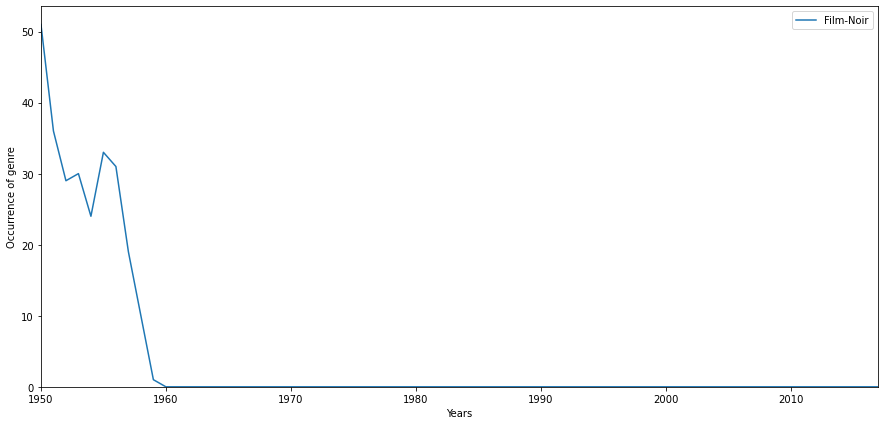

In [3]:
# Defining x axis
x = dataset["year"]
# Defining y axis
yNoir = dataset["Film-Noir"]
# Aplying the figursize
plt.figure(figsize = figuresize)
# Drawing the plot
plt.plot(x, yNoir, label = "Film-Noir")
# Setting the y axis limit to 0
plt.ylim(0)
# Setting the x axis limits to the range of years in our csv table
plt.xlim(1950,2017)
# Defining the x and y axis labels
plt.ylabel("Occurrence of genre")
plt.xlabel("Years")
# Aplying the labels to the plot
plt.legend()

On the basis of this diagram our thesis can be proven. You can see that no black and white films have been shot in our CSV table since `1960`.  
Of course you have to consider that our data set by far does not contain all films that have been shot in the years but refers to one sample.  
Nevertheless, some cultural institutions write that they see a trend that indicates that black and white films are to some extent making their way back into the cinema. You can read [here](https://www.deutschlandfunkkultur.de/schwarz-weiss-das-neue-bunt-warum-spielfilme-haeufig-auf.2168.de.html?dram:article_id=391768) what Dlf Kultur writes about this topic.